## Closed Form Solution in Linear Regression
$\theta = (X^TX)^{-1}X^TY$

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

In [61]:
# Generate Dataset
X, Y = make_regression(n_samples=400, n_features=1, n_informative=1, noise=1.8, random_state=11)

print(X.shape, Y.shape)
Y = Y.reshape((-1,1))
print(X.shape, Y.shape)


(400, 1) (400,)
(400, 1) (400, 1)


In [62]:
# Normalize
X = (X-X.mean())/X.std()

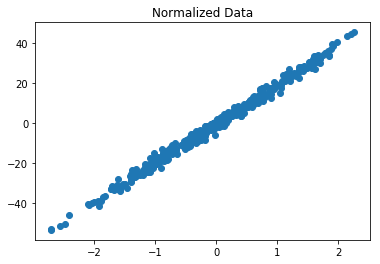

In [63]:
# Visualize
plt.figure()
plt.scatter(X, Y)
plt.title("Normalized Data")
plt.show()

In [64]:
# Append column of ones to X to make dimensions equal to m x (n+1) and theta has (n+1) x 1

ones = np.ones((X.shape[0],1))

X_ = np.hstack((X, ones))

print(X.shape)
print(X_.shape)

# print(X_[:5, :])

(400, 1)
(400, 2)


In [73]:
def predict(X, theta):
    return np.dot(X, theta)

def getThetaClosedForm(X, Y):
    Y = np.mat(Y)               # Convert Y to matrix
    firstPart = np.dot(X.T, X)
    secondPart = np.dot(X.T, Y)
#     print(Y.shape)
#     print(firstPart.shape)
#     print(secondPart.shape)
#     theta =  np.dot(np.linalg.pinv(firstPart),secondPart)
    theta =  np.linalg.pinv(firstPart)*secondPart
    return theta

In [74]:
theta = getThetaClosedForm(X_, Y)
print(theta)
# print(theta.shape)

[[19.45877082]
 [-0.29187892]]


In [75]:
print(Y.shape)
# print(Y[:5,:])
print((Y - predict(X_, theta)).shape)

(400, 1)
(400, 1)


(400, 1)
(400, 1)


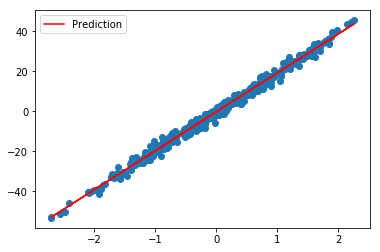

In [76]:
plt.figure()
plt.scatter(X, Y)
y_pred = predict(X_, theta)
print(y_pred.shape)
print(Y.shape)
plt.plot(X, y_pred, color='red', label='Prediction')
plt.legend()
plt.show()

In [78]:
print(Y.shape, y_pred.shape)

y_pred = y_pred[:, 0]
print(Y.shape, y_pred.shape)

u = ((Y - y_pred).T*(Y-y_pred)).sum() 
# u = ((Y - y_pred) **2).sum()
v = ((Y - Y.mean())**2).sum()

# print(u)
# print(v)
r2 = 1.0 - u/v
print(r2)

(400, 1) (400, 1)
(400, 1) (400, 1)
0.9921978559637155


In [79]:
lr = LinearRegression(normalize=True)
lr.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [80]:
print(lr.coef_, lr.intercept_)
print(lr.score(X, Y))

[[19.45877082]] [-0.29187892]
0.9921978559637155


In [81]:
a = np.array([[1,2,3],[4,5,6],[7,8,9]])

print(a)
print()
print(a.T)

print(a*a.T)
print(np.dot(a, a.T))

[[1 2 3]
 [4 5 6]
 [7 8 9]]

[[1 4 7]
 [2 5 8]
 [3 6 9]]
[[ 1  8 21]
 [ 8 25 48]
 [21 48 81]]
[[ 14  32  50]
 [ 32  77 122]
 [ 50 122 194]]
